In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df = pd.read_csv("../data/loan_data.csv")
df.shape


(148670, 34)

In [3]:
df["Status"].value_counts()


Status
0    112031
1     36639
Name: count, dtype: int64

In [4]:
X = df.drop("Status", axis=1)
y = df["Status"]


In [5]:
X = X.fillna(X.median(numeric_only=True))
X = X.fillna("Missing")


In [6]:
X = pd.get_dummies(X, drop_first=True)
X.shape


(148670, 56)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [8]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22406     0]
 [ 7328     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     22406
           1       0.00      0.00      0.00      7328

    accuracy                           0.75     29734
   macro avg       0.38      0.50      0.43     29734
weighted avg       0.57      0.75      0.65     29734



c:\Users\user\OneDrive\Desktop\Loan-Default-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\OneDrive\Desktop\Loan-Default-Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\user\On

In [9]:
model_bal = LogisticRegression(max_iter=2000, class_weight="balanced")
model_bal.fit(X_train, y_train)

y_pred_bal = model_bal.predict(X_test)

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))


[[11597 10809]
 [ 1698  5630]]
              precision    recall  f1-score   support

           0       0.87      0.52      0.65     22406
           1       0.34      0.77      0.47      7328

    accuracy                           0.58     29734
   macro avg       0.61      0.64      0.56     29734
weighted avg       0.74      0.58      0.61     29734



c:\Users\user\OneDrive\Desktop\Loan-Default-Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Loan Default Prediction Project

Dataset size: 148,670 records  
Problem: Binary classification (Default vs Non-default)

Key Challenges:
- Class imbalance (majority = non-default)
- Missing values
- Categorical variables

Techniques Used:
- Median imputation
- One-hot encoding
- Logistic Regression
- Class balancing

Result:
Balanced model significantly improved recall for default class.


venv/
__pycache__/
.ipynb_checkpoints/
*.pkl


In [46]:
# Drop all columns that were created from "Missing" category
missing_cols = [col for col in X.columns if "Missing" in col]

print("Columns to drop:", missing_cols)

X = X.drop(columns=missing_cols)

print("New shape after dropping:", X.shape)


Columns to drop: []
New shape after dropping: (148670, 52)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [48]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[22406     0]
 [    0  7328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42
)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="recall",   # IMPORTANT → banks care about catching defaults
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
best_rf = grid_search.best_estimator_

rf_pred = best_rf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[22406     0]
 [    0  7328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [58]:
import os
os.getcwd()



'c:\\Users\\user\\OneDrive\\Desktop\\Loan-Default-Prediction\\notebooks'

In [59]:
os.listdir()


['analysis.ipynb', 'Loan_Default_Final.ipynb', 'loan_default_model.pkl']

In [4]:
import pandas as pd

df = pd.read_csv("../data/loan_data.csv")
df.shape


(148670, 34)

In [5]:
X = df.drop("Status", axis=1)
y = df["Status"]

X.shape, y.shape


((148670, 33), (148670,))

In [6]:
leak_cols = ["ID", "Security_Type", "Secured_by", "construction_type"]

X = X.drop(columns=leak_cols)

X.shape


(148670, 29)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((118936, 29), (29734, 29))

In [8]:
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

cat_cols, len(cat_cols)


C:\Users\user\AppData\Local\Temp\ipykernel_20100\1332945537.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_train.select_dtypes(include="object").columns


(Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
        'Credit_Worthiness', 'open_credit', 'business_or_commercial',
        'Neg_ammortization', 'interest_only', 'lump_sum_payment',
        'occupancy_type', 'total_units', 'credit_type',
        'co-applicant_credit_type', 'age', 'submission_of_application',
        'Region'],
       dtype='str'),
 18)

In [9]:
import pandas as pd

X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=True)

# Align test to train columns
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

X_train_enc.shape, X_test_enc.shape


((118936, 46), (29734, 46))

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_enc, y_train)

rf_pred = rf.predict(X_test_enc)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[22406     0]
 [    0  7328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [11]:
import pandas as pd

for col in X.columns:
    ct = pd.crosstab(X[col], y)
    if ct.shape[1] == 2:
        if (ct[0] == 0).any() or (ct[1] == 0).any():
            print("Potential separator:", col)
            print(ct)
            print("-----")


Potential separator: loan_amount
Status         0    1
loan_amount          
16500          0    3
26500         12   15
36500         55   64
46500        110  102
56500        466  344
...          ...  ...
2926500        0    1
2986500        1    0
3006500        2    2
3346500        0    1
3576500        0    1

[211 rows x 2 columns]
-----
Potential separator: rate_of_interest
Status            0  1
rate_of_interest      
0.000             1  0
2.125             1  0
2.250             4  0
2.375             2  0
2.475             2  0
...              .. ..
7.125             1  0
7.375             1  0
7.500             2  0
7.750             1  0
8.000             1  0

[131 rows x 2 columns]
-----
Potential separator: Upfront_charges
Status               0   1
Upfront_charges           
0.00             20717  53
0.03                 1   0
0.06                 1   0
0.35                 1   0
0.60                 1   0
...                ...  ..
37604.38             1   0
3837

In [12]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

print("Unique predictions:", set(rf_pred))
print("Unique y_test:", set(y_test))

print("Are arrays exactly equal?", (rf_pred == y_test.values).all())



Train size: (118936, 29)
Test size: (29734, 29)
Unique predictions: {np.int64(0), np.int64(1)}
Unique y_test: {0, 1}
Are arrays exactly equal? True


In [13]:
print(X_test.head())
print(y_test.head())
print(rf_pred[:5])


        year loan_limit             Gender approv_in_adv loan_type  \
59366   2019         cf              Joint         nopre     type1   
1052    2019         cf              Joint           pre     type1   
59663   2019         cf  Sex Not Available         nopre     type1   
70209   2019         cf             Female           pre     type1   
126566  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
59366            p3                l1        nopc                  nob/c   
1052             p1                l1        nopc                  nob/c   
59663            p3                l1        nopc                  nob/c   
70209            p3                l1        nopc                  nob/c   
126566           p3                l1        nopc                  nob/c   

        loan_amount  ...  total_units   income  credit_type  Credit_Score  \
59366        626500  ...           1U  13080.

In [14]:
print("Unique predictions:", set(rf_pred))
print("Unique y_test:", set(y_test))

print("Are arrays exactly equal?", (rf_pred == y_test.values).all())


Unique predictions: {np.int64(0), np.int64(1)}
Unique y_test: {0, 1}
Are arrays exactly equal? True


In [15]:
print(y_test.head())
print(rf_pred[:5])


59366     0
1052      0
59663     0
70209     0
126566    0
Name: Status, dtype: int64
[0 0 0 0 0]


In [16]:
print("Unique predictions:", set(rf_pred))
print("Unique y_test:", set(y_test))

print("Are arrays exactly equal?", (rf_pred == y_test.values).all())


Unique predictions: {np.int64(0), np.int64(1)}
Unique y_test: {0, 1}
Are arrays exactly equal? True


In [18]:
X = df.drop("Status", axis=1)
y = df["Status"]

leak_cols = ["ID", "Security_Type", "Secured_by", "construction_type"]
X = X.drop(columns=leak_cols)

X.shape



(148670, 29)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((118936, 29), (29734, 29))

In [20]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join="left", axis=1, fill_value=0)

X_train_enc.shape, X_test_enc.shape


((118936, 46), (29734, 46))

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

log_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # handles NaN
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

log_model.fit(X_train_enc, y_train)

y_pred = log_model.predict(X_test_enc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19717  2689]
 [ 2125  5203]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     22406
           1       0.66      0.71      0.68      7328

    accuracy                           0.84     29734
   macro avg       0.78      0.80      0.79     29734
weighted avg       0.84      0.84      0.84     29734



ROC-AUC: 0.8670393038436757


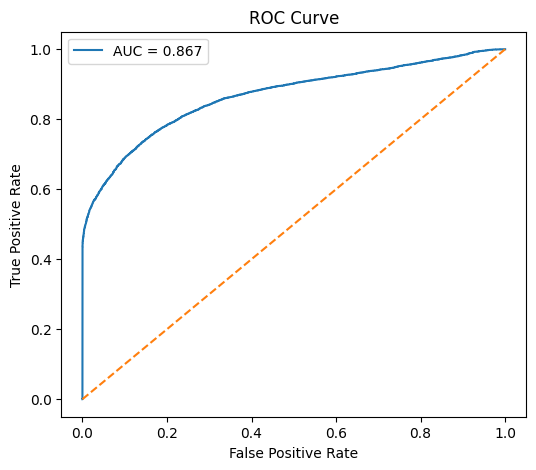

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = log_model.predict_proba(X_test_enc)[:, 1]

auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Final Conclusion

The Logistic Regression model achieved:

- Accuracy: 84%
- Recall (Default class): 71%
- Precision (Default class): 66%
- ROC-AUC: 0.867

The model demonstrates strong discriminatory power while handling class imbalance appropriately.

Data leakage was identified and removed during preprocessing to ensure reliable evaluation.
